In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP tools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# For wordclouds
from wordcloud import WordCloud, STOPWORDS


In [4]:
import zipfile
import os

# Path to your uploaded zip
zip_path = "/content/archive.zip"

# Extract contents
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")

# Check what files were extracted
os.listdir("/content/")


['.config', 'Hotel_Reviews.csv', 'archive.zip', 'sample_data']

In [5]:
import pandas as pd

df = pd.read_csv("/content/Hotel_Reviews.csv")
df.head()


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [6]:
# Example preprocessing
df = df[['Review_Total_Positive_Word_Counts','Review_Total_Negative_Word_Counts','Reviewer_Score','Positive_Review','Negative_Review']]

# Create a text + sentiment column
df['Review'] = df['Positive_Review'] + " " + df['Negative_Review']
df['Sentiment'] = df['Reviewer_Score'].apply(lambda x: 1 if x > 7 else 0)  # 1=Positive, 0=Negative

df = df[['Review', 'Sentiment']]
df.head()


,Review,Sentiment
0,Only the park outside of the hotel was beauti...,0
1,No real complaints the hotel was great great ...,1
2,Location was good and staff were ok It is cut...,1
3,Great location in nice surroundings the bar a...,0
4,Amazing location and building Romantic settin...,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [11]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8787082638538799
              precision    recall  f1-score   support

           0       0.72      0.48      0.57     17596
           1       0.90      0.96      0.93     85552

    accuracy                           0.88    103148
   macro avg       0.81      0.72      0.75    103148
weighted avg       0.87      0.88      0.87    103148



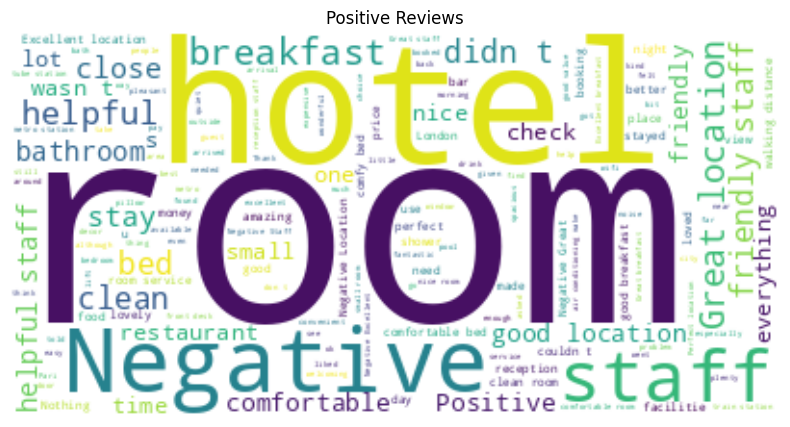

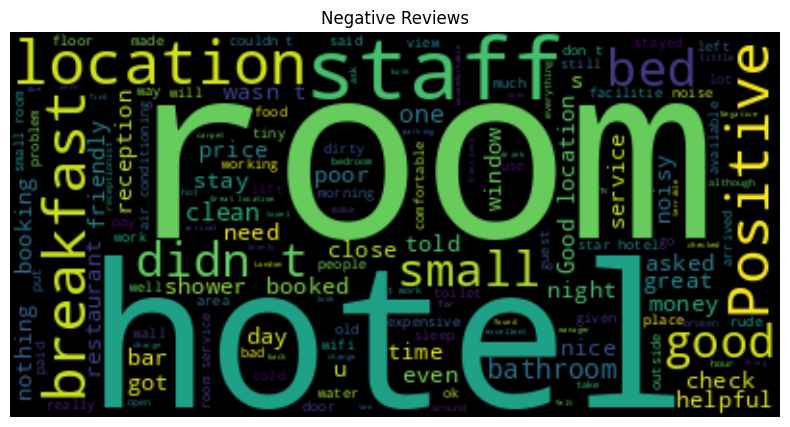

In [15]:
positive_text = " ".join(df[df['Sentiment']==1]['Review'])
negative_text = " ".join(df[df['Sentiment']==0]['Review'])

wordcloud_pos = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=200).generate(positive_text)
wordcloud_neg = WordCloud(stopwords=STOPWORDS, background_color="black", max_words=200).generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Reviews")
plt.show()

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Reviews")
plt.show()

In [16]:
# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the coefficients from the model
coefficients = model.coef_[0]

# Create a pandas Series of coefficients with feature names as index
coef_series = pd.Series(coefficients, index=feature_names)

# Get the top positive and negative words
top_positive_words = coef_series.sort_values(ascending=False).head(20)
top_negative_words = coef_series.sort_values(ascending=True).head(20)

print("Top 20 Positive Words:")
print(top_positive_words)

print("\nTop 20 Negative Words:")
print(top_negative_words)

Top 20 Positive Words:
excellent      7.066600
loved          6.681191
amazing        6.378415
wonderful      5.637443
lovely         5.447714
fantastic      5.411119
great          5.249874
perfect        5.183703
superb         5.061060
beautiful      4.454680
fabulous       4.416548
brilliant      4.388663
exceptional    4.117912
spotless       4.039430
enjoyed        3.937022
minor          3.914708
outstanding    3.857699
comfortable    3.753851
fab            3.632411
spacious       3.623383
dtype: float64

Top 20 Negative Words:
worst            -5.009032
rude             -4.831451
dirty            -4.682271
filthy           -4.407516
unfriendly       -4.386799
disgusting       -4.054909
shocking         -4.054638
terrible         -3.934676
disinterested    -3.893273
unhelpful        -3.864323
horrible         -3.832252
bugs             -3.818118
impolite         -3.817911
awful            -3.811002
unprofessional   -3.733547
shabby           -3.561250
stolen           -3.550306

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
